1. Read in the peanuts_reviews.csv Download peanuts_reviews.csvdataset. How many reviews are there? What percentage of the reviews are positive (4 or 5) and what percentage are negative (1 or 2) reviews?

68% 4-5 stars
32% 1-2 stars

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sklearn
import numpy as np
from transformers import LayoutLMv3FeatureExtractor 
from PIL import Image
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
df = pd.read_csv(r'peanuts_reviews.csv')
df2= df.groupby(["rating"]).count()
df2

,text,summary
rating,,
1,92,92
2,67,67
4,41,41
5,293,293


In [3]:
df['type'] = np.where(df['rating']== 1, "Low", 
                      np.where(df['rating']== 2, "Low", "High"))
df 



,rating,text,summary,type
0,1,Not a great value,F,Low
1,2,not the best snack.,Two Stars,Low
2,2,"I would have given this a 4 or 5 ,but the salt...","Great, except one",Low
3,1,terrible after taste,One Star,Low
4,1,You can buy at Walmart for $6.98,One Star,Low
...,...,...,...,...
488,5,perfect,Five Stars,High
489,5,"Good buy, as described, packed well and on time",Good choice,High
490,5,Tastes more like buffalo seasoning over roaste...,Five Stars,High
491,5,These are super addicting.,"If you love nuts, try Deez Nuts.",High


In [4]:
df.groupby(["type"]).count()/df.count()
#68% 4-5 stars
#32% 1-2 stars

,rating,summary,text,type
type,,,,
High,0.677485,0.677485,0.677485,NaN
Low,0.322515,0.322515,0.322515,NaN


2. Generate a two wordclouds: one for good reviews and one for bad reviews. Provide a short (2-3 sentences) explanation of what the wordcloud does and any noteworthy insights we can see.Generate a two wordclouds: one for good reviews and one for bad reviews. Provide a short (2-3 sentences) explanation of what the wordcloud does and any noteworthy insights we can see.

In [5]:
me = pd.DataFrame(df["text"],
                 columns=["text"])

In [6]:
def process_text(t):
    import re
    
    t = t.lower()
    t = re.sub(r"http\S+", "", t)      # remove links (anything that doesn't have a space after http)
    t = re.sub(r"www.\S+", "", t)      # remove links
    t = re.sub("[^a-z]", " ", t)
    return t

In [7]:
# Apply process_text function to raw_text column
df["clean_text"] = df["text"].apply(process_text)

In [8]:
df

,rating,text,summary,type,clean_text
0,1,Not a great value,F,Low,not a great value
1,2,not the best snack.,Two Stars,Low,not the best snack
2,2,"I would have given this a 4 or 5 ,but the salt...","Great, except one",Low,i would have given this a or but the salt...
3,1,terrible after taste,One Star,Low,terrible after taste
4,1,You can buy at Walmart for $6.98,One Star,Low,you can buy at walmart for
...,...,...,...,...,...
488,5,perfect,Five Stars,High,perfect
489,5,"Good buy, as described, packed well and on time",Good choice,High,good buy as described packed well and on time
490,5,Tastes more like buffalo seasoning over roaste...,Five Stars,High,tastes more like buffalo seasoning over roaste...
491,5,These are super addicting.,"If you love nuts, try Deez Nuts.",High,these are super addicting


In [9]:
onedf = pd.DataFrame({"clean_text":" ".join(df["clean_text"])},
                           index=[0])
#df["clean_text"] = df["clean_text"].str

In [10]:
dfsmall = pd.DataFrame(df,
                 columns=["clean_text"])
dfsmall = pd.DataFrame({"clean_text":" ".join(df["clean_text"])},
                 index=[0])

In [11]:
wc = WordCloud().generate(dfsmall["clean_text"].to_string())

In [12]:
df

,rating,text,summary,type,clean_text
0,1,Not a great value,F,Low,not a great value
1,2,not the best snack.,Two Stars,Low,not the best snack
2,2,"I would have given this a 4 or 5 ,but the salt...","Great, except one",Low,i would have given this a or but the salt...
3,1,terrible after taste,One Star,Low,terrible after taste
4,1,You can buy at Walmart for $6.98,One Star,Low,you can buy at walmart for
...,...,...,...,...,...
488,5,perfect,Five Stars,High,perfect
489,5,"Good buy, as described, packed well and on time",Good choice,High,good buy as described packed well and on time
490,5,Tastes more like buffalo seasoning over roaste...,Five Stars,High,tastes more like buffalo seasoning over roaste...
491,5,These are super addicting.,"If you love nuts, try Deez Nuts.",High,these are super addicting


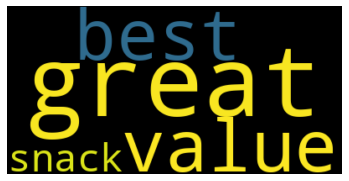

In [13]:

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

3. Using scikit-learn's CountVectorizer, what are top five most frequent single words (unigrams) used in positive reviews? What are top five most frequent single words used in negative reviews? (For questions 3-5, exclude the default English stopwords from scikit-learn's vectorizer)

Positive reviews: Great, good, peanuts, love, product

Negative reviews: Peanuts, stale, like, taste, nuts

In [14]:
# selecting rows based on condition 
low_df = df.loc[(df['type'] == 'Low')]
high_df = df.loc[(df['type'] == 'High')]
             #    ) & dataframe['Stream'].isin(options)] 

In [15]:
# All text from site as one row of data (one "document")
onedf = pd.DataFrame({"clean_text":" ".join(high_df["clean_text"])},
                           index=[0])



# 1 Instantiates a vectorizer to vectorize the text (extract features) based on ngram parameters we specify
v = CountVectorizer(stop_words="english",
                    ngram_range=(1, 1))
    
# 2 Vectorizes the text, creates a dataframe with terms and frequencies
dtm = v.fit_transform(onedf["clean_text"])
    
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
dtm_df = dtm_df.T

# Reset index, replace column names with term and freq
dtm_df.reset_index(inplace=True)
dtm_df.columns = ["term", "freq"]
dtm_df= dtm_df.sort_values(by="freq", ascending=False)

alt.Chart(dtm_df.head(5)).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

In [16]:
# All text from site as one row of data (one "document")
onedf = pd.DataFrame({"clean_text":" ".join(low_df["clean_text"])},
                           index=[0])



# 1 Instantiates a vectorizer to vectorize the text (extract features) based on ngram parameters we specify
v = CountVectorizer(stop_words="english",
                    ngram_range=(1, 1))
    
# 2 Vectorizes the text, creates a dataframe with terms and frequencies
dtm = v.fit_transform(onedf["clean_text"])
    
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
dtm_df = dtm_df.T

# Reset index, replace column names with term and freq
dtm_df.reset_index(inplace=True)
dtm_df.columns = ["term", "freq"]
dtm_df= dtm_df.sort_values(by="freq", ascending=False)

alt.Chart(dtm_df.head(5)).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

4. What are top five most frequent two word phrases used in positive reviews? What are top five most frequent two word phrases used in negative reviews?

Negative: like dirt, stale stale, terrible taste, honey roasted, tasted stale

Positive: peanuts good, great price, good price, great value, good great

In [17]:
onedf = pd.DataFrame({"clean_text":" ".join(low_df["clean_text"])},
                           index=[0])

# Instantiate vectorizer
v = CountVectorizer(stop_words="english", ngram_range=(2, 2))

# Vectorize column of text (remove stopwords count frequency of unique words)
dtm = v.fit_transform(onedf["clean_text"])

# Create as datafrmae with dense arrays and use words a column names from vectorizer
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
lowfreq_df = dtm_df.T


# Reset index, replace column names with term and freq
lowfreq_df.reset_index(inplace=True)
lowfreq_df.columns = ["term", "freq"]
lowfreq_df= lowfreq_df.sort_values(by="freq", ascending=False)
lowfreq_df.head(5)

,term,freq
86,like dirt,8
176,stale stale,8
199,terrible taste,8
67,honey roasted,7
192,tasted stale,7


In [18]:
onedf = pd.DataFrame({"clean_text":" ".join(high_df["clean_text"])},
                           index=[0])

# Instantiate vectorizer
v = CountVectorizer(stop_words="english", ngram_range=(2, 2))

# Vectorize column of text (remove stopwords count frequency of unique words)
dtm = v.fit_transform(onedf["clean_text"])

# Create as datafrmae with dense arrays and use words a column names from vectorizer
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
highfrq_df = dtm_df.T

highfrq_df
# Reset index, replace column names with term and freq
highfrq_df.reset_index(inplace=True)
highfrq_df.columns = ["term", "freq"]
highfrq_df= highfrq_df.sort_values(by="freq", ascending=False)
highfrq_df.head(5)

,term,freq
473,peanuts good,12
307,great price,9
256,good price,7
319,great value,7
245,good great,7


5. Create two plots: one with the 10 most common two word phrases used in negative reviews and their frequencies (order the phrases by frequency) and one with the 10 most common two word phrases used in positive reviews and their frequencies (order the phrases by frequency). Write a short explanation (8-10 sentences) of what insights the company can take away from the plots and answer at least the following questions:

What aspects of the product are positive reviewers mentioning? What are the negative reviewers mentioning?
Do the results indicate indicate that unsatisfied customers are most unhappy with product prices, quality, variety, or something else?
What is one actionable insight that a manager should takeaway from your analysis?

The positive reviews are mostly talking about the price. However, the negative reviews are talking about the flavor. Some reviews say they disliked the taste, which could mean that there is work for food scientists on this product. Several negative reviews say the item was stale. This could be a learning for the packaging or quality contol team. It sounds like additional quality assurance may be neccessary. Alot of the positive reviews mention price, which means that the customers are price sensitive. This company should not raise their prices or try to offer a high end product.

In [19]:
# Plot and sort y by descending x value
alt.Chart(highfrq_df.head(10)).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

In [20]:
# Plot and sort y by descending x value
alt.Chart(lowfreq_df.head(10)).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

6. Create a user-defined function that takes a dataframe, instantiates a vectorizer with a custom n-gram range with minimum and maximum set to 1 as default but that can be adjusted as an input to the function, that vectorizes that text column of the dataframe, converts the sparse arrays to dense arrays, sums the frequencies of the terms, sorts the results by the count and keeps only the top n number of results where n is a parameter in the function that is 10 by default but can be adjusted, and returns a plot of the results (using a visualization package of your choice). The function should take four arguments.

In [21]:
def userfunc(data, minn=1, maxn=1, top_n=10):
    
# Instantiate vectorizer
    v = CountVectorizer(stop_words="english", ngram_range=(minn, maxn))

# Vectorize column of text (remove stopwords count frequency of unique words)
    dtm = v.fit_transform(data)

# Create as datafrmae with dense arrays and use words a column names from vectorizer
    dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
    func_df = dtm_df.T

# Reset index, replace column names with term and freq
    func_df.reset_index(inplace=True)
    func_df.columns = ["term", "freq"]
    sortedn = func_df.sort_values(by="freq", ascending=False)
    top_df = sortedn.head(top_n)

    plt.figure(figsize=(10, 6))
    plt.barh(top_df['term'], top_df['freq'], color='pink')
    plt.xlabel('Freq')
    plt.ylabel('Term')
    plt.title(f'Top {top_n} Terms')
    plt.gca().invert_yaxis()
    plt.show()


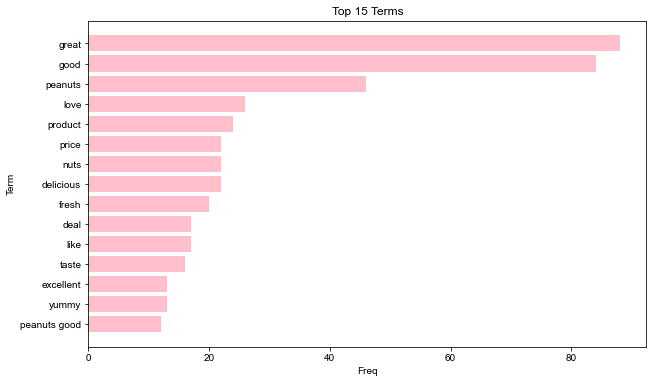

In [22]:
userfunc(onedf["clean_text"], 1, 2, 15)

7. Use the function you created in question 6 to generate a plot with the seven most frequent three-word phrases used in positive reviews of the peanuts with the phrases on the y-axis and the frequencies on the x-axis, ordered in descending order of frequencies from top to bottom. Note: this should be done in one line of code.

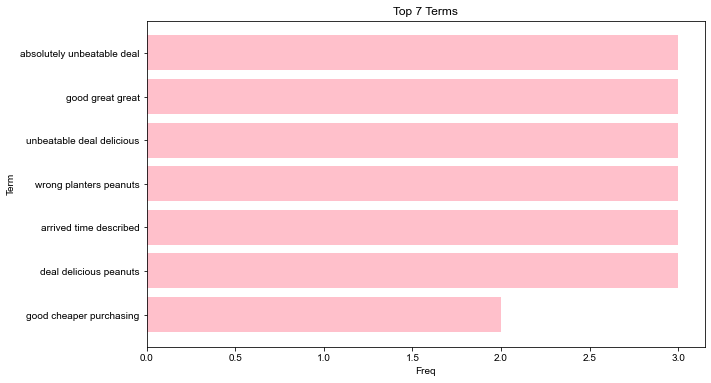

In [23]:
userfunc(onedf["clean_text"], 3, 3, 7)